In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

import pyro
import pyro.infer
import pyro.optim
import pyro.distributions as dist

from itertools import product

### 4.2.a)

### 4.2.b)

$$Var(4X) = 4^2 Var(X) \rightarrow 4X \sim \mathcal{N}(0,4)$$

$$Var(Y) = Var(4X) + Var(N_y) \rightarrow P_Y^{\mathbb{M}} = \mathcal{N}(0, \sqrt{16 + 1}) = \mathcal{N}(0, \sqrt{17})$$

### 4.2.c)

$$P_Y^{\mathbb{M}:do(X=2)} = \mathcal{N}(0 + 4*2, 1) = \mathcal{N}(8, 1)$$

### 4.2.d)

### 4.2.e)

$P(X,Y)$ is a bivariate normal distribution, so $P_\mathbb{M}(X|Y=2)$ (or $P_X^{\mathbb{M}:Y=2}$) is (see https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Bivariate_case_2)

correlation:

$$\mu_x=0, \mu_y=0, \sigma_x=1, \sigma_y=\sqrt{4^2 +1} $$

$$\rho = \frac{E[(X-\mu_x)(Y-\mu_y)]}{\sigma_x \sigma_y}$$

$$= \frac{E[(X-0)(4X+N_y-0)]}{\sigma_x \sigma_y}$$

$$= \frac{E[4X^2 + X N_y)]}{\sigma_x \sigma_y}$$

(because $X \bot N_Y$) $$= \frac{E[4X^2] + E[X] E[N_y]}{\sigma_x \sigma_y}$$ 

(1 degree of freedom because only one variable)

$$X^2 \sim \chi^2(1) \rightarrow E(4X^2) = 4*1 =4$$ 

$$\rightarrow \rho = \frac{4}{1 * \sqrt{17}}$$ 

$$P_X^{\mathbb{M}:Y=2} = \mathcal{N}\big(\mu_x + \frac{\sigma_x}{\sigma_y}\rho(2-\mu_y), (1-\rho^2)\sigma_x^2\big)$$

$$= \mathcal{N}\big(0 + \frac{\sigma_x}{\sigma_y}\rho(2-\mu_y), (1-\rho^2)\sigma_x^2\big)$$

$$= \mathcal{N}\big(\frac{1}{\sqrt{17}}\frac{4}{\sqrt{17}}(2-0), (1-(\frac{4}{\sqrt{17}})^2)*1\big)$$

$$= \mathcal{N}\big(\frac{4}{17}*2, (1-\frac{16}{17}))\big)$$
$$P_X^{\mathbb{M}:Y=2} = \mathcal{N}\big(\frac{8}{17}, \frac{1}{17}\big)$$

### 4.2.f)

$$P_X^{\mathbb{M}:do(Y=2)} = \mathcal{N}(0,1)$$

### 4.2.g)

In [6]:
def model():
    X = pyro.sample("X", dist.Normal(0.0, 1.0))
    Ny = pyro.sample("Ny", dist.Normal(0.0, 1.0))
    Y = 4*X + Ny
    Y = pyro.sample("Y", dist.Normal(Y, 0.01))

In [7]:
trace_handler = pyro.poutine.trace(model)

In [9]:
NUM_SAMPLES = 10
l_samples = []
for i in range(NUM_SAMPLES):
    trace = trace_handler.get_trace()
    x = trace.nodes["X"]["value"].item()
    y = trace.nodes["Y"]["value"].item()
    sample = (x, y)
    l_samples.append(sample)

In [10]:
l_samples

[(-0.9973377585411072, -1.4332162141799927),
 (0.03974306955933571, -1.371384620666504),
 (-1.641197919845581, -6.667521953582764),
 (0.4094753861427307, -0.5385472774505615),
 (-0.7070794105529785, -3.0479891300201416),
 (0.11347012221813202, 0.9687702655792236),
 (-0.9303310513496399, -3.4573769569396973),
 (1.1109298467636108, 5.710343360900879),
 (0.8607052564620972, 2.0270843505859375),
 (-0.3293702006340027, -0.8347093462944031)]

### 4.2.h)

In [11]:
model_do = pyro.condition(model, data={"X": torch.tensor(2)})

In [13]:
trace_handler = pyro.poutine.trace(model_do)

In [38]:
NUM_SAMPLES = 100
l_samples = []
for i in range(NUM_SAMPLES):
    trace = trace_handler.get_trace()
    y = trace.nodes["Y"]["value"].item()
    l_samples.append(y)

In [39]:
%matplotlib inline

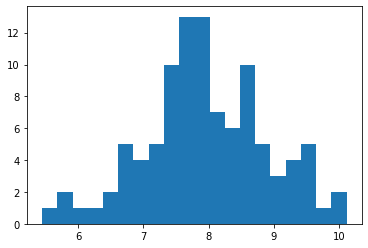

In [41]:
plt.hist(l_samples,bins=20);

### 4.2.i)

In [42]:
model_cond = pyro.condition(model, data={"Y": torch.tensor(2)})

In [43]:
trace_handler = pyro.poutine.trace(model_cond)

In [44]:
NUM_SAMPLES = 100
l_samples = []
for i in range(NUM_SAMPLES):
    trace = trace_handler.get_trace()
    x = trace.nodes["X"]["value"].item()
    y = trace.nodes["Y"]["value"].item()
    l_samples.append((x,y))

In [45]:
l_samples

[(0.4640348255634308, 2),
 (-0.7923606634140015, 2),
 (-0.2575669586658478, 2),
 (1.310144066810608, 2),
 (0.857098400592804, 2),
 (-0.5778070688247681, 2),
 (-1.784244179725647, 2),
 (0.0661126971244812, 2),
 (0.3210814297199249, 2),
 (-1.272904396057129, 2),
 (0.8688341975212097, 2),
 (1.2782179117202759, 2),
 (-1.8729407787322998, 2),
 (0.46437692642211914, 2),
 (-0.47941577434539795, 2),
 (1.402477502822876, 2),
 (0.23233476281166077, 2),
 (2.005610942840576, 2),
 (-1.487827181816101, 2),
 (1.340366005897522, 2),
 (1.008825421333313, 2),
 (-1.338932991027832, 2),
 (0.8225927352905273, 2),
 (1.4490039348602295, 2),
 (0.013145948760211468, 2),
 (1.123124599456787, 2),
 (2.4526166915893555, 2),
 (0.35774582624435425, 2),
 (0.6881250143051147, 2),
 (1.2024418115615845, 2),
 (-0.164274200797081, 2),
 (1.3279355764389038, 2),
 (-0.925493597984314, 2),
 (-0.3707062900066376, 2),
 (1.4305201768875122, 2),
 (-0.1102343201637268, 2),
 (-0.6955512166023254, 2),
 (-1.2032320499420166, 2),
 (-0

In [12]:
pyro.infer.Importance(model_do, num_samples=100)